# Cifar - from keras examples

In [1]:
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train = np.swapaxes(X_train,1,3)
X_train = np.swapaxes(X_train,1,2)

X_test = np.swapaxes(X_test,1,3)
X_test = np.swapaxes(X_test,1,2)

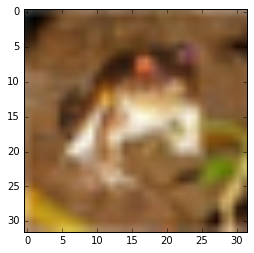

In [4]:
plt.imshow(X_train[0])

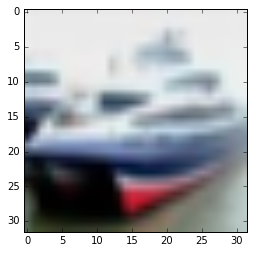

In [5]:
plt.imshow(X_test[1])

# exercise - implement convnet on Cifar10

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

In [7]:
import tensorflow as tf
tf.python.control_flow_ops = tf

In [8]:
img_rows, img_cols = 32, 32
nb_classes = 10

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)

In [9]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [10]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, 
          nb_epoch=10,verbose=1,
          validation_data=(X_test, Y_test))


#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 612s - loss: 1.6729 - acc: 0.3930 - val_loss: 1.4809 - val_acc: 0.4762
Epoch 2/10
50000/50000 [==============================] - 495s - loss: 1.2492 - acc: 0.5596 - val_loss: 1.0270 - val_acc: 0.6374
Epoch 3/10
50000/50000 [==============================] - 421s - loss: 1.0863 - acc: 0.6211 - val_loss: 0.9472 - val_acc: 0.6660
Epoch 4/10
50000/50000 [==============================] - 317s - loss: 1.0161 - acc: 0.6523 - val_loss: 0.9250 - val_acc: 0.6815
Epoch 5/10
50000/50000 [==============================] - 289s - loss: 0.9807 - acc: 0.6662 - val_loss: 1.4322 - val_acc: 0.5981
Epoch 6/10
50000/50000 [==============================] - 392s - loss: 0.9843 - acc: 0.6689 - val_loss: 0.8919 - val_acc: 0.6990
Epoch 7/10
50000/50000 [==============================] - 273s - loss: 0.9847 - acc: 0.6708 - val_loss: 1.0272 - val_acc: 0.6695
Epoch 8/10
50000/50000 [=======================

# NOW with data augmentation

In [11]:
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(X_train, Y_train,
                    batch_size=32),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=10,
                    validation_data=(X_test, Y_test))

Using real-time data augmentation.
Epoch 1/10
50000/50000 [==============================] - 194s - loss: 1.7414 - acc: 0.3637 - val_loss: 1.3347 - val_acc: 0.5167
Epoch 2/10
50000/50000 [==============================] - 199s - loss: 1.3594 - acc: 0.5121 - val_loss: 1.4196 - val_acc: 0.5342
Epoch 3/10
50000/50000 [==============================] - 197s - loss: 1.2299 - acc: 0.5657 - val_loss: 1.0548 - val_acc: 0.6321
Epoch 4/10
50000/50000 [==============================] - 197s - loss: 1.1797 - acc: 0.5859 - val_loss: 1.2007 - val_acc: 0.5759
Epoch 5/10
50000/50000 [==============================] - 203s - loss: 1.1585 - acc: 0.5997 - val_loss: 1.1211 - val_acc: 0.6174
Epoch 6/10
50000/50000 [==============================] - 203s - loss: 1.1511 - acc: 0.6040 - val_loss: 1.0885 - val_acc: 0.6321
Epoch 7/10
50000/50000 [==============================] - 217s - loss: 1.1660 - acc: 0.6044 - val_loss: 1.0927 - val_acc: 0.6515
Epoch 8/10
50000/50000 [==============================] - 238s